# Drift Detection Results Analysis

This notebook provides a comprehensive analysis of drift detection methods performance across different types of data streams. The analysis includes evaluation of various drift detection algorithms on datasets with different characteristics such as splits, joins, moves, borderlines, and imbalance scenarios.

## Table of Contents
1. [Setup and Configuration](#Setup-and-Configuration)
2. [Dataset Group Selection](#Dataset-Group-Selection)
3. [Data Loading and Preprocessing](#Data-Loading-And-Preprocessing)
4. [Performance Metrics Visualization](#Performance-Metrics-Visualization)
5. [Summary Statistics](#Summary-Statistics)

## Setup and Configuration

### Import Required Libraries
The following libraries are used for data analysis, visualization, and statistical computations:

In [66]:
import pickle
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Group Selection

### Available Dataset Groups
The following dataset groups are available for analysis. Uncomment the desired group to analyze:

- **Splits**: Datasets with split-type concept drift
- **Joins**: Datasets with join-type concept drift  
- **Moves**: Datasets with move-type concept drift
- **Borderlines**: Datasets with borderline imbalance scenarios
- **Imbalances**: Datasets with various imbalance ratios

In [ ]:
group = ['Split3.arff',
'Split5.arff',
'Split7.arff',
'StaticIm10_Split3.arff',
'StaticIm10_Split5.arff',
'StaticIm10_Split7.arff',
'StaticIm1_Split3.arff',
'StaticIm1_Split5.arff',
'StaticIm1_Split7.arff',
]  # Splits

# group = [
#     "Join3.arff",
#     "Join5.arff",
#     "Join7.arff",
#     "StaticIm10_Join3.arff",
#     "StaticIm10_Join5.arff",
#     "StaticIm10_Join7.arff",
#     "StaticIm1_Join3.arff",
#     "StaticIm1_Join5.arff",
#     "StaticIm1_Join7.arff"
# ]  # Joins

# group = [
#     "Move3.arff",
#     "Move5.arff",
#     "Move7.arff",
#     "StaticIm10_Move3.arff",
#     "StaticIm10_Move5.arff",
#     "StaticIm10_Move7.arff",
#     "StaticIm1_Move3.arff",
#     "StaticIm1_Move5.arff",
#     "StaticIm1_Move7.arff"
# ]   # Moves

# group = [
#     "Borderline40.arff",
#     "Borderline60.arff",
#     "Borderline80.arff",
#     "Borderline100.arff",
#     "StaticIm10_Im1+Borderline100.arff",
#     "StaticIm10_Im1+Borderline60.arff"
# ]   # Borderlines

# group = [
#     "Im1.arff", "Im10.arff", "Im2.arff", "Im20.arff", "Im3.arff", "Im30.arff", "Im40.arff", "Im5.arff",
#     "StaticIm1.arff", "StaticIm10.arff", "StaticIm10_Im1.arff", "StaticIm10_Im2.arff", "StaticIm10_Im3.arff",
#     "StaticIm10_Im5.arff", "StaticIm10_Im60.arff", "StaticIm10_Im70.arff", "StaticIm10_Im80.arff", "StaticIm10_Im90.arff",
#     "StaticIm1_Im60.arff", "StaticIm1_Im70.arff", "StaticIm1_Im80.arff", "StaticIm1_Im90.arff", "StaticIm1_Im99.arff",
#     "StaticIm2.arff", "StaticIm2_Im1.arff", "StaticIm2_Im60.arff", "StaticIm2_Im70.arff", "StaticIm2_Im80.arff", 
#     "StaticIm2_Im90.arff", "StaticIm2_Im98.arff",
#     "StaticIm20.arff", "StaticIm20_Im1.arff", "StaticIm20_Im10.arff", "StaticIm20_Im2.arff", "StaticIm20_Im3.arff",
#     "StaticIm20_Im5.arff", "StaticIm20_Im60.arff", "StaticIm20_Im70.arff", "StaticIm20_Im80.arff", "StaticIm20_Im90.arff",
#     "StaticIm30.arff", "StaticIm30_Im1.arff", "StaticIm30_Im10.arff", "StaticIm30_Im2.arff", "StaticIm30_Im20.arff",
#     "StaticIm30_Im3.arff", "StaticIm30_Im5.arff", "StaticIm30_Im60.arff", "StaticIm30_Im70.arff", "StaticIm30_Im80.arff", "StaticIm30_Im90.arff",
#     "StaticIm3_Im1.arff", "StaticIm3_Im2.arff", "StaticIm3_Im60.arff", "StaticIm3_Im70.arff",
#     "StaticIm3_Im80.arff", "StaticIm3_Im90.arff", "StaticIm3_Im97.arff",
#     "StaticIm40.arff", "StaticIm40_Im1.arff", "StaticIm40_Im10.arff", "StaticIm40_Im2.arff", "StaticIm40_Im20.arff",
#     "StaticIm40_Im3.arff", "StaticIm40_Im30.arff", "StaticIm40_Im5.arff", "StaticIm40_Im60.arff", "StaticIm40_Im70.arff",
#     "StaticIm40_Im80.arff", "StaticIm40_Im90.arff",
#     "StaticIm5_Im1.arff", "StaticIm5_Im2.arff", "StaticIm5_Im3.arff", "StaticIm5_Im60.arff",
#     "StaticIm5_Im70.arff", "StaticIm5_Im80.arff", "StaticIm5_Im90.arff", "StaticIm5_Im95.arff"
# ]  # Imbalancies

print(len(group))

9


In [69]:
group_name = "Splits"
# group_name = "Joins"
# group_name = "Moves"
# group_name = "Borderlines"
# group_name = "Imbalances"

### Group Name Configuration
Set the name for the selected dataset group (used for plot titles and file naming):

In [70]:
dataset_names = []

all_data = {}

windows_size = 5000

## Data Loading and Preprocessing

### Initialize Data Structures
Initialize variables for storing dataset names, aggregated data, and analysis parameters:

In [71]:
def load_data(stream_group):
    with open(f'results/{stream_group}/metrics.pkl', 'rb') as file:
        results = pickle.load(file)

    with open(f'results/{stream_group}/results.pkl', 'rb') as file:
        data = pickle.load(file)

    return results, data

### Data Loading Function
Function to load experimental results from pickle files:

In [ ]:
# Define all experimental groups available in the results directory
all_groups = [
    'composition_basic',
    'composition_complex',
    'composition_with_imbalance',
    'imbalance_combinations',
    'imbalance_complex',
    'imbalance_example_types',
    'locality_basic',
    'locality_with_imbalance',
    'imbalance_basic',
]

# Load and process data from all experimental groups
for stream_group in all_groups:
    results, data = load_data(stream_group)

    # Remove problematic datasets if they exist
    if 'StaticIm3.arff' in data.keys():
        data.pop('StaticIm3.arff')
    if 'StaticIm5.arff' in data.keys():
        data.pop('StaticIm5.arff')

    # Collect all dataset names for filtering
    dataset_names.extend(list(data.keys()))
    
    # Process detection results for each dataset and model
    for dataset in data.keys():
        for model in data[dataset]['detections'].keys():
            # Initialize detection_delays list if not exists
            if 'detection_delays' not in results[model].keys():
                results[model]['detection_delays'] = []
            
            # Calculate detection delay for this dataset
            detections = data[dataset]['detections'][model]
            # Find first detection after concept drift occurs (at position 70000)
            first_after_70000 = [i for i in detections if i >= 70000]
            if len(first_after_70000) > 0:
                first_after_70000 = first_after_70000[0]
                # Calculate delay in number of windows
                delay = np.ceil((first_after_70000 - 70000) / windows_size)
            else:
                # If no detection occurred, use maximum possible delay
                first_after_70000 = None
                delay = (100000 - 70000) / windows_size
            results[model]['detection_delays'].append(delay)
    
    # Aggregate results across all datasets for each model
    for model in results.keys():
        if model not in all_data.keys():
            all_data[model] = {}
        
        for metric in results[model].keys():
            if metric not in all_data[model].keys():
                all_data[model][metric] = []
            # Extend the list with current group's results
            all_data[model][metric].extend(results[model][metric])

### Load and Process All Experimental Data
Load results from all experimental groups and calculate detection delays:

In [ ]:
# Create a boolean mask to filter datasets by the selected group
mask = []
for dataset in dataset_names:
    if dataset not in group:
        mask.append(False)
    else:
        mask.append(True)

# Apply the mask to filter data for the selected group only
for model in all_data.keys():
    for metric in all_data[model].keys():
        all_data[model][metric] = np.array(all_data[model][metric])[mask]

# Update results variable with filtered data
results = all_data

### Filter Data by Selected Group
Filter the loaded data to include only the selected dataset group:

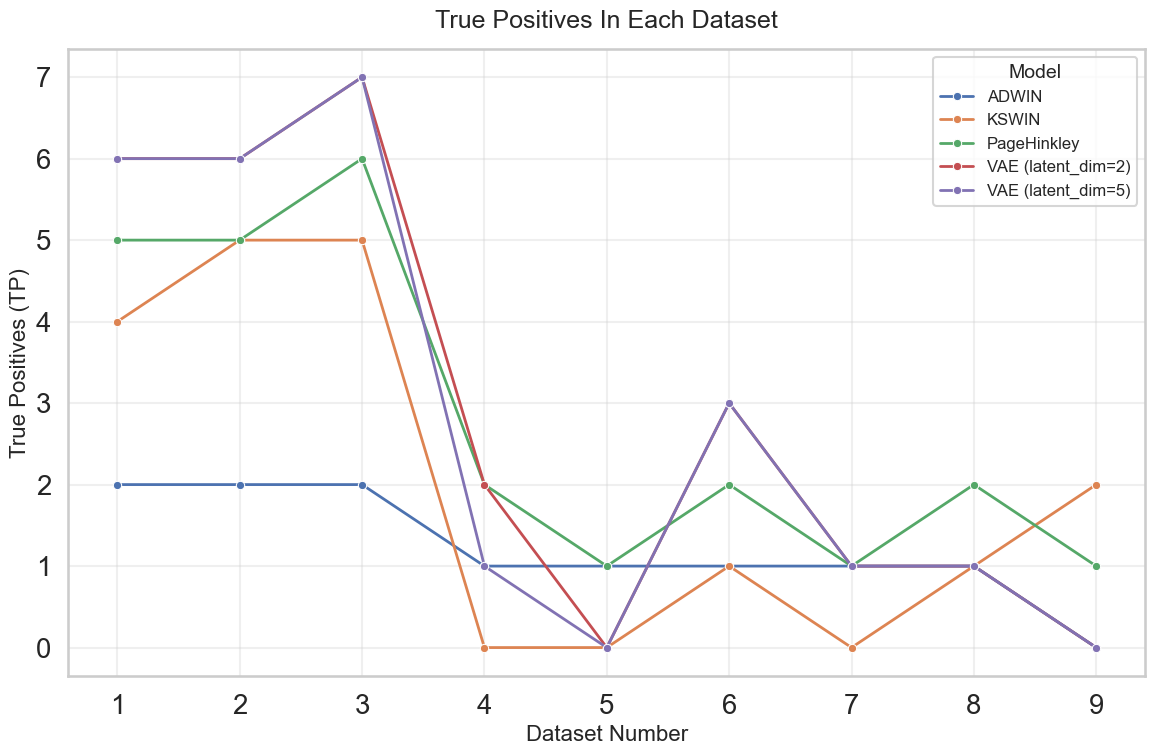

In [ ]:
tp_data = []
for model in results.keys():
    for i, value in enumerate(results[model]['TP']):
        tp_data.append({
            'Dataset Number': i + 1,
            'TP': value,
            'Model': model
        })

tp_df = pd.DataFrame(tp_data)

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=tp_df,
    x='Dataset Number',
    y='TP',
    hue='Model',
    marker='o',
    linewidth=2,
    markersize=6
)

plt.title(f'True Positives - {group_name} Group', fontsize=18, pad=15)
plt.xlabel('Dataset Number', fontsize=16)
plt.ylabel('True Positives (TP)', fontsize=16)
plt.legend(title='Model', fontsize=12, title_fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'plots/{group_name}_tp_plot.pdf', dpi=300)
plt.show()

## Performance Metrics Visualization

### True Positives Analysis

#### Combined View - All Models
Comparison of True Positives across all models and datasets:

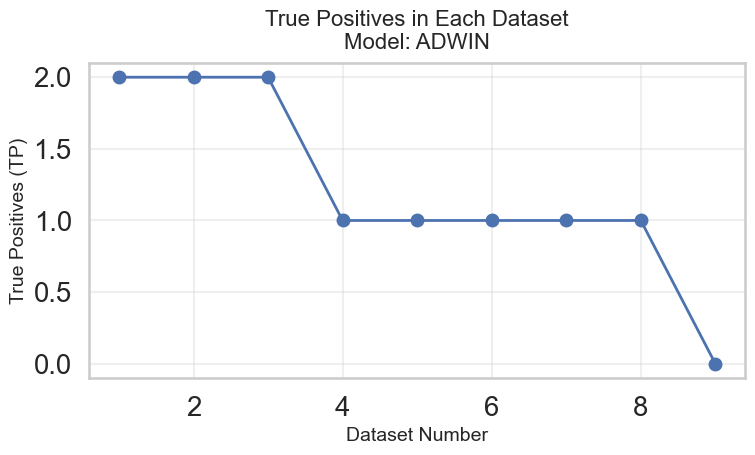

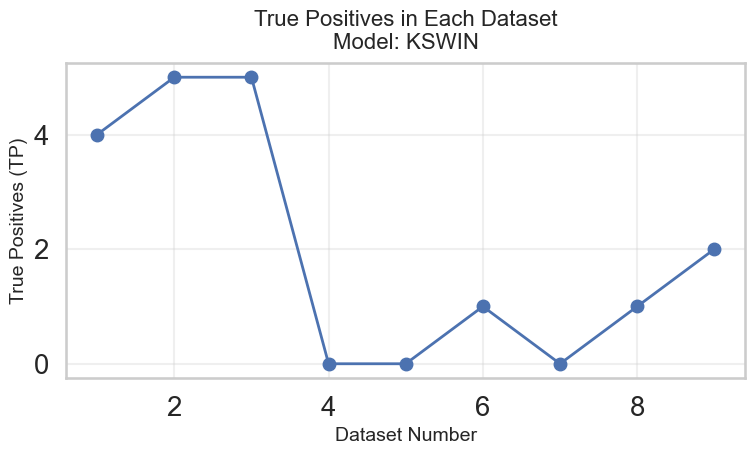

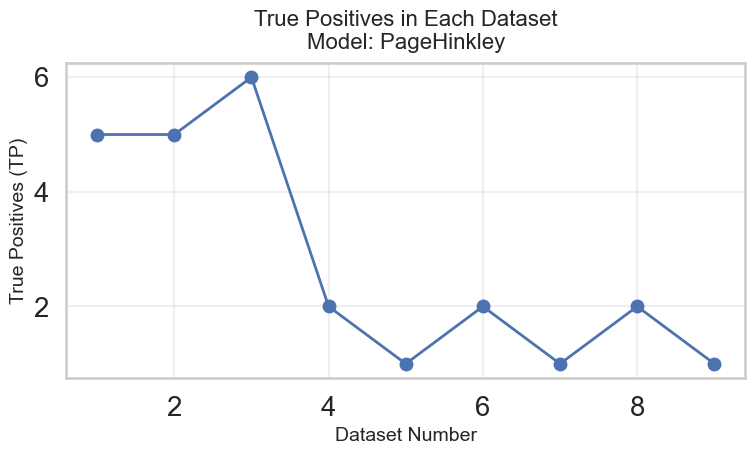

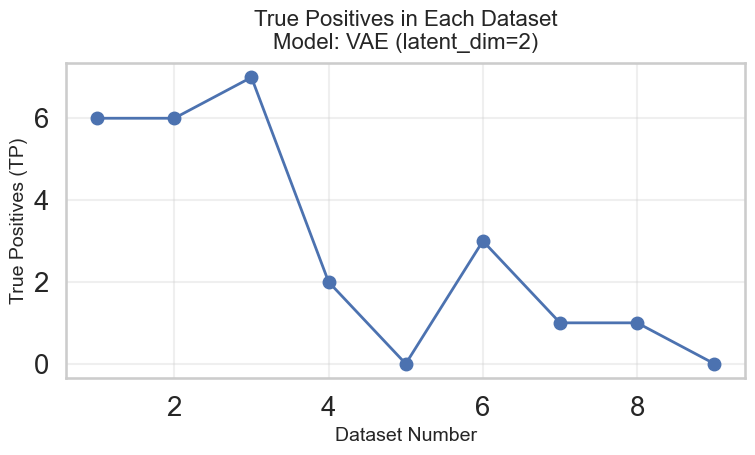

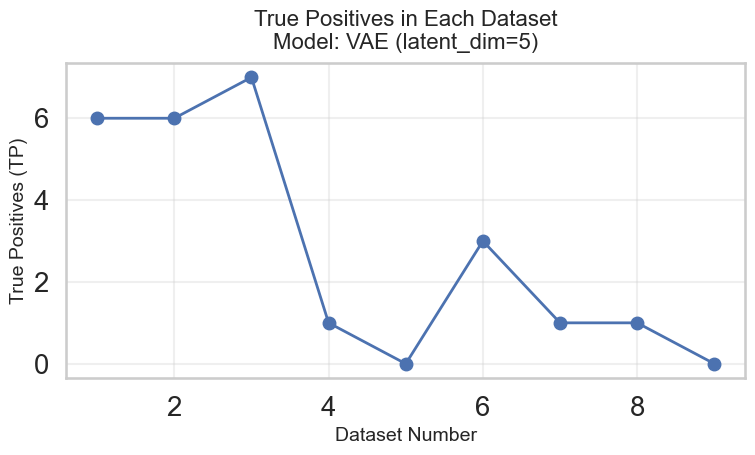

In [ ]:
tp_data = []
for model in results.keys():
    for i, value in enumerate(results[model]['TP']):
        tp_data.append({
            'Dataset Number': i + 1,
            'TP': value,
            'Model': model
        })

tp_df = pd.DataFrame(tp_data)

# Create separate plots for each model
for model in tp_df['Model'].unique():
    model_df = tp_df[tp_df['Model'] == model]
    plt.figure(figsize=(8, 5))
    plt.plot(
        model_df['Dataset Number'],
        model_df['TP'],
        marker='o',
        linewidth=2
    )
    plt.title(f'True Positives - {group_name} Group\nModel: {model}', fontsize=16, pad=10)
    plt.xlabel('Dataset Number', fontsize=14)
    plt.ylabel('True Positives (TP)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'plots/{group_name}_tp_plot_{model}.pdf', dpi=300)
    plt.show()

#### Individual Model Views
Separate plots for each model's True Positive performance:

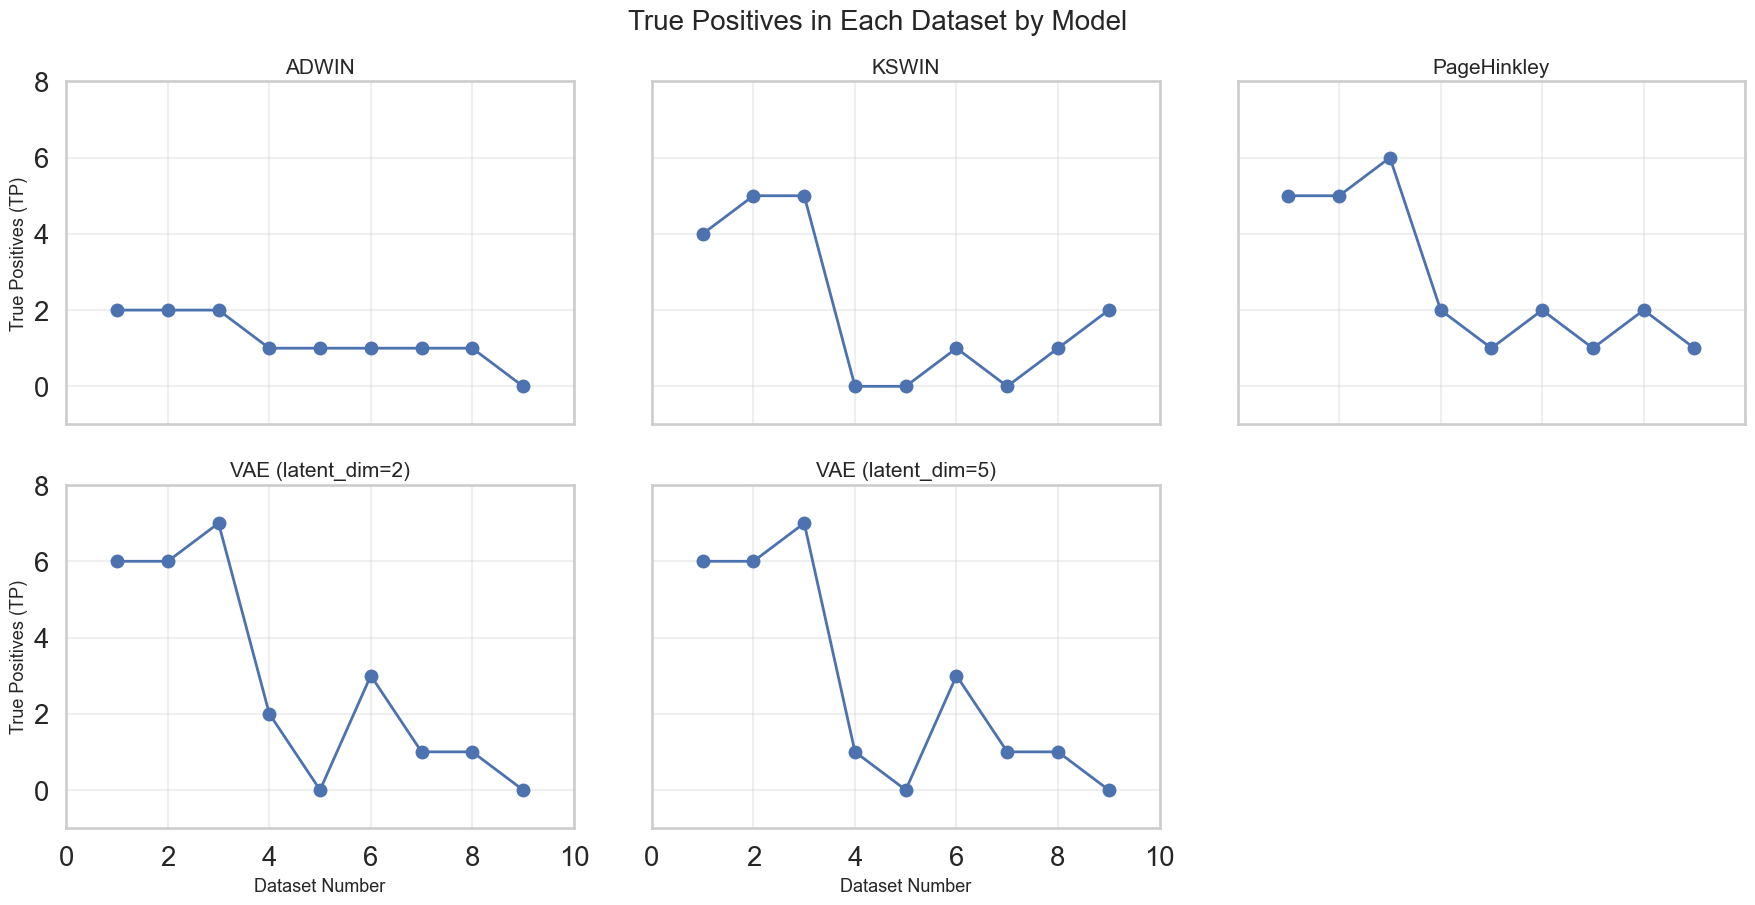

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tp_data = []
for model in results.keys():
    for i, value in enumerate(results[model]['TP']):
        tp_data.append({
            'Dataset Number': i + 1,
            'TP': value,
            'Model': model
        })

tp_df = pd.DataFrame(tp_data)

models = tp_df['Model'].unique()
num_models = len(models)

# Set subplot grid dimensions (2 rows, 3 columns - may leave empty subplot)
rows, cols = 2, 3

# Set common axis ranges with small margins
x_min = tp_df['Dataset Number'].min() - 1
x_max = tp_df['Dataset Number'].max() + 1
y_min = tp_df['TP'].min() - 1
y_max = tp_df['TP'].max() + 1

fig, axes = plt.subplots(rows, cols, figsize=(18, 9), sharex=True, sharey=True)

for idx, model in enumerate(models):
    r, c = divmod(idx, cols)
    ax = axes[r, c]
    model_df = tp_df[tp_df['Model'] == model]
    ax.plot(
        model_df['Dataset Number'],
        model_df['TP'],
        marker='o',
        linewidth=2
    )
    ax.set_title(model, fontsize=15)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    if r == rows - 1:
        ax.set_xlabel('Dataset Number', fontsize=13)
    if c == 0:
        ax.set_ylabel('True Positives (TP)', fontsize=13)

# Remove empty subplots if fewer models than grid spaces
if num_models < rows * cols:
    for idx in range(num_models, rows * cols):
        fig.delaxes(axes.flatten()[idx])

plt.suptitle(f'True Positives - {group_name} Group (All Models)', fontsize=20, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.savefig(f'plots/{group_name}_tp_plot_subplots.pdf', dpi=300, bbox_inches='tight')
plt.show()

#### Subplot Grid View
All models displayed in a single figure with shared axes for easy comparison:

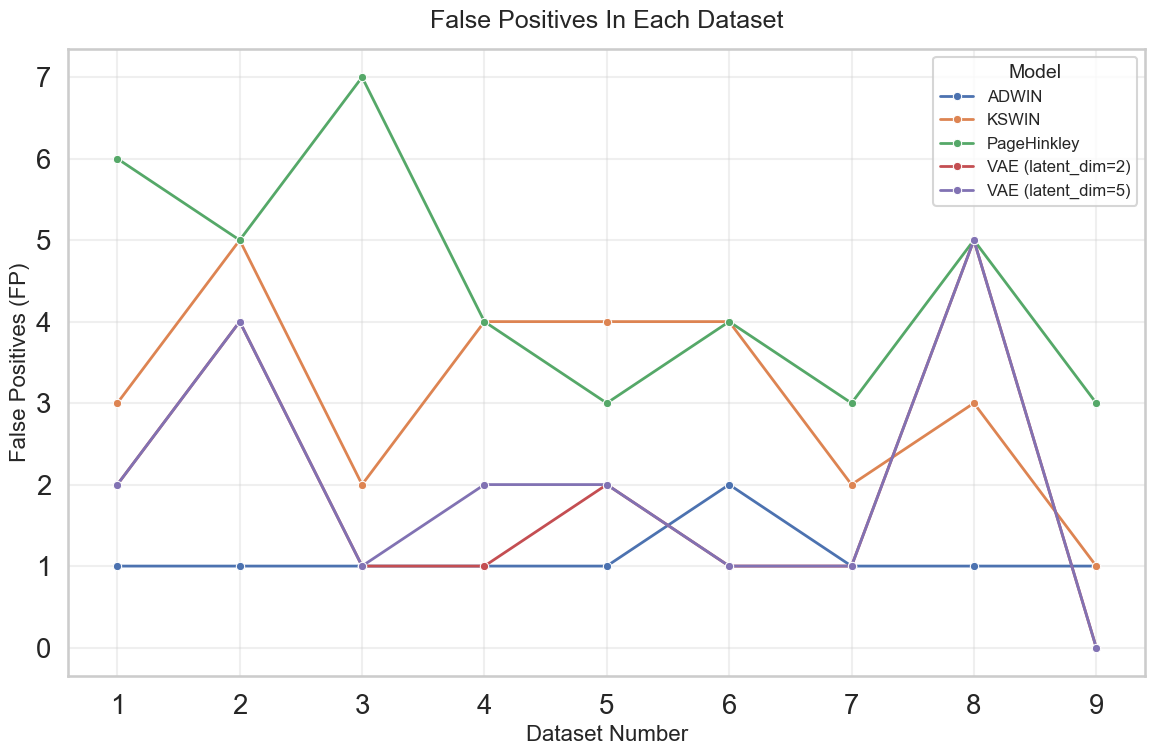

In [ ]:
fp_data = []
for model in results.keys():
    for i, value in enumerate(results[model]['FP']):
        fp_data.append({
            'Dataset Number': i + 1,
            'FP': value,
            'Model': model
        })

fp_df = pd.DataFrame(fp_data)

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=fp_df,
    x='Dataset Number',
    y='FP',
    hue='Model',
    marker='o',
    linewidth=2,
    markersize=6
)

plt.title(f'False Positives - {group_name} Group', fontsize=18, pad=15)
plt.xlabel('Dataset Number', fontsize=16)
plt.ylabel('False Positives (FP)', fontsize=16)
plt.legend(title='Model', fontsize=12, title_fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'plots/{group_name}_fp_plot.pdf', dpi=300)
plt.show()

### False Positives Analysis

#### Combined View - All Models

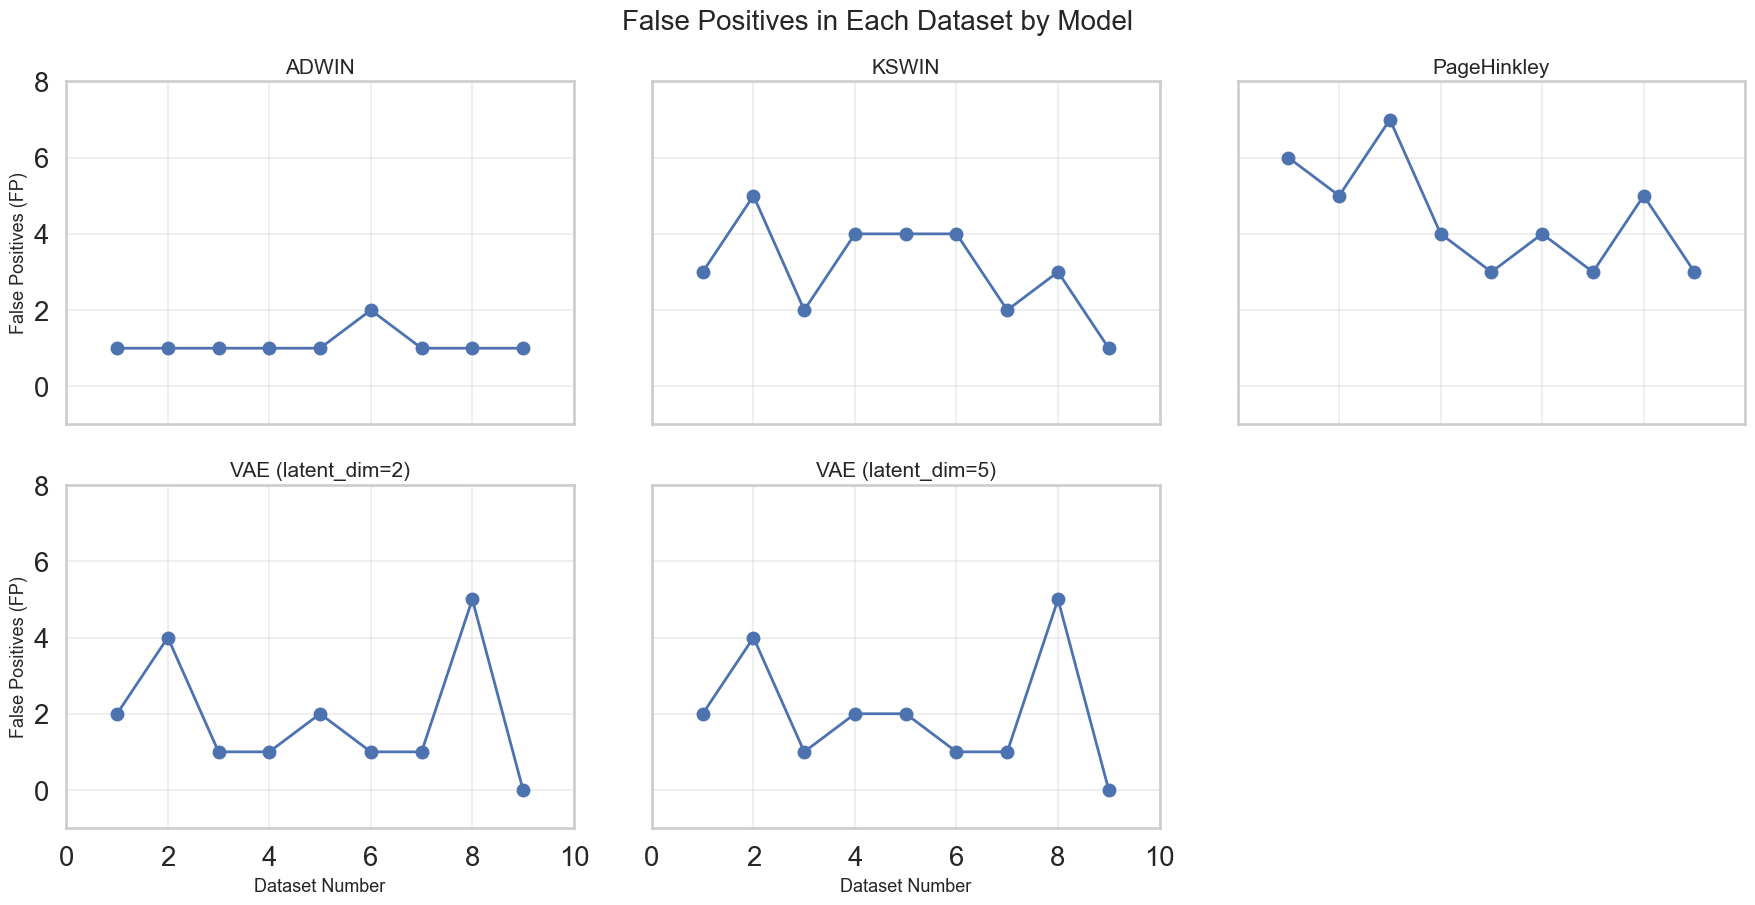

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fp_data = []
for model in results.keys():
    for i, value in enumerate(results[model]['FP']):
        fp_data.append({
            'Dataset Number': i + 1,
            'FP': value,
            'Model': model
        })

fp_df = pd.DataFrame(fp_data)

models = fp_df['Model'].unique()
num_models = len(models)

# Set subplot grid dimensions (2 rows, 3 columns - may leave empty subplot)
rows, cols = 2, 3

# Set common axis ranges with small margins
x_min = fp_df['Dataset Number'].min() - 1
x_max = fp_df['Dataset Number'].max() + 1
y_min = fp_df['FP'].min() - 1
y_max = fp_df['FP'].max() + 1

fig, axes = plt.subplots(rows, cols, figsize=(18, 9), sharex=True, sharey=True)

for idx, model in enumerate(models):
    r, c = divmod(idx, cols)
    ax = axes[r, c]
    model_df = fp_df[fp_df['Model'] == model]
    ax.plot(
        model_df['Dataset Number'],
        model_df['FP'],
        marker='o',
        linewidth=2
    )
    ax.set_title(model, fontsize=15)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    if r == rows - 1:
        ax.set_xlabel('Dataset Number', fontsize=13)
    if c == 0:
        ax.set_ylabel('False Positives (FP)', fontsize=13)

# Remove empty subplots if fewer models than grid spaces
if num_models < rows * cols:
    for idx in range(num_models, rows * cols):
        fig.delaxes(axes.flatten()[idx])

plt.suptitle(f'False Positives - {group_name} Group (All Models)', fontsize=20, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.savefig(f'plots/{group_name}_fp_plot_subplots.pdf', dpi=300, bbox_inches='tight')
plt.show()

#### False Positives - Subplot Grid View

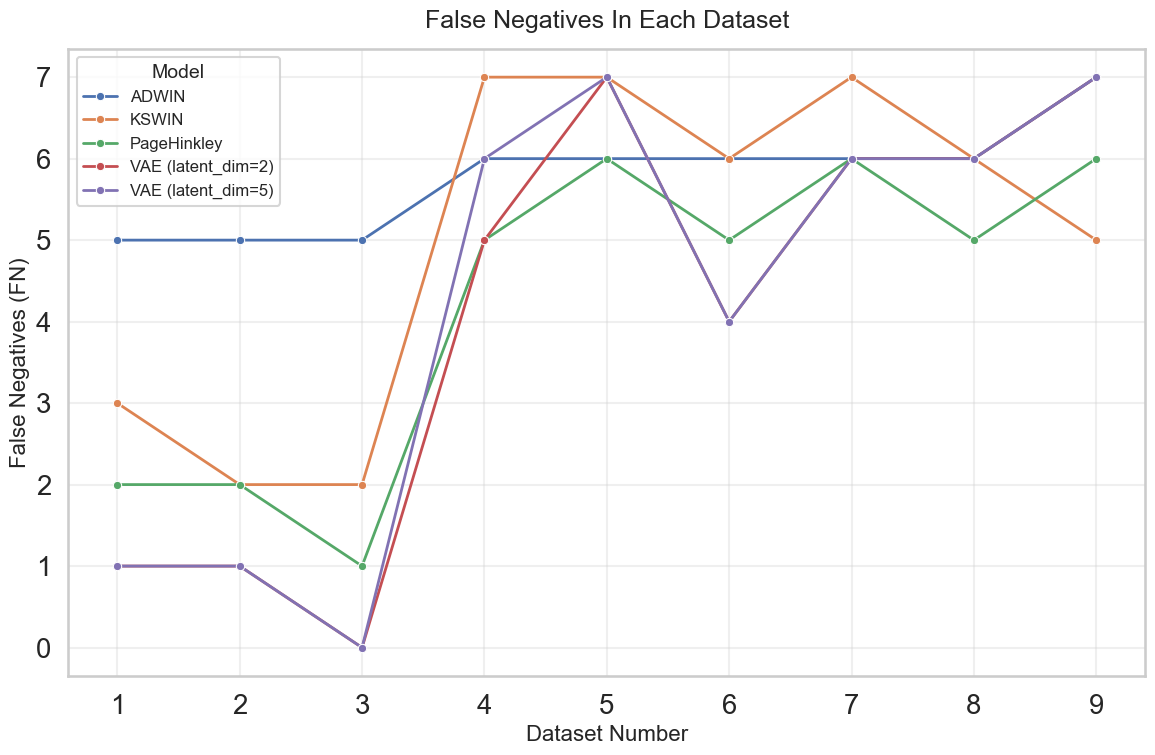

In [ ]:
fn_data = []
for model in results.keys():
    for i, value in enumerate(results[model]['FN']):
        fn_data.append({
            'Dataset Number': i + 1,
            'FN': value,
            'Model': model
        })
fn_df = pd.DataFrame(fn_data)

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=fn_df,
    x='Dataset Number',
    y='FN',
    hue='Model',
    marker='o',
    linewidth=2,
    markersize=6
)

plt.title(f'False Negatives - {group_name} Group', fontsize=18, pad=15)
plt.xlabel('Dataset Number', fontsize=16)
plt.ylabel('False Negatives (FN)', fontsize=16)
plt.legend(title='Model', fontsize=12, title_fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'plots/{group_name}_fn_plot.pdf', dpi=300)
plt.show()

### False Negatives Analysis

#### Combined View - All Models

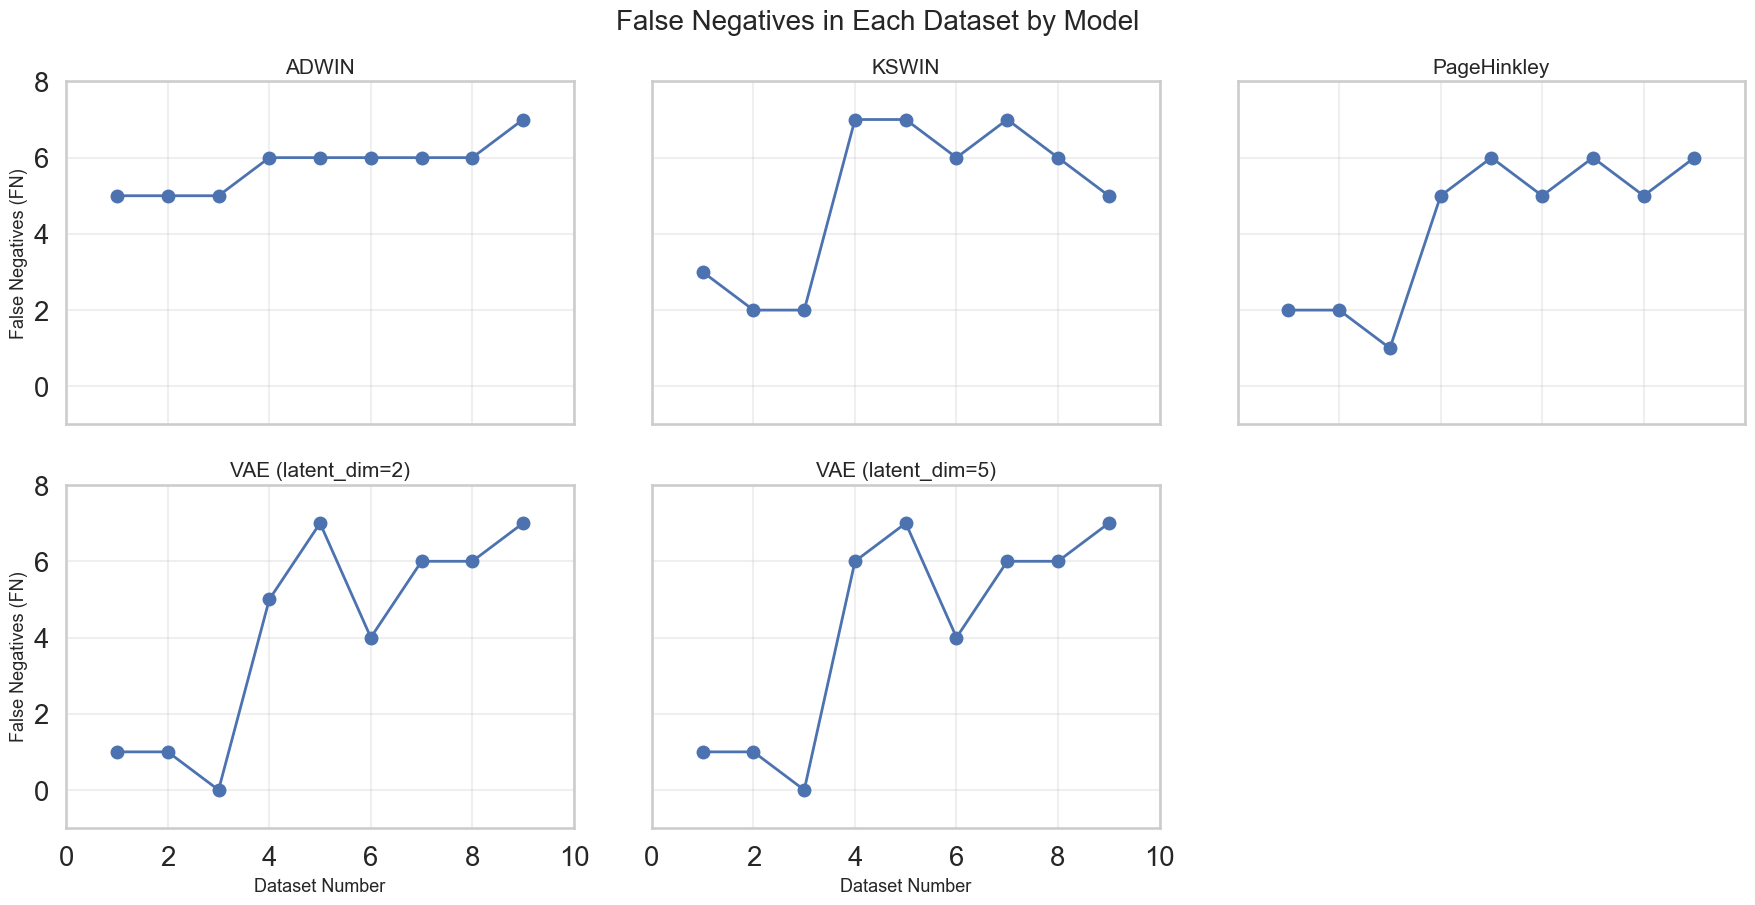

In [ ]:
fn_data = []
for model in results.keys():
    for i, value in enumerate(results[model]['FN']):
        fn_data.append({
            'Dataset Number': i + 1,
            'FN': value,
            'Model': model
        })

fn_df = pd.DataFrame(fn_data)

models = fn_df['Model'].unique()
num_models = len(models)

# Set subplot grid dimensions (2 rows, 3 columns - may leave empty subplot)
rows, cols = 2, 3

# Set common axis ranges with small margins
x_min = fn_df['Dataset Number'].min() - 1
x_max = fn_df['Dataset Number'].max() + 1
y_min = fn_df['FN'].min() - 1
y_max = fn_df['FN'].max() + 1

fig, axes = plt.subplots(rows, cols, figsize=(18, 9), sharex=True, sharey=True)

for idx, model in enumerate(models):
    r, c = divmod(idx, cols)
    ax = axes[r, c]
    model_df = fn_df[fn_df['Model'] == model]
    ax.plot(
        model_df['Dataset Number'],
        model_df['FN'],
        marker='o',
        linewidth=2
    )
    ax.set_title(model, fontsize=15)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    if r == rows - 1:
        ax.set_xlabel('Dataset Number', fontsize=13)
    if c == 0:
        ax.set_ylabel('False Negatives (FN)', fontsize=13)

# Remove empty subplots if fewer models than grid spaces
if num_models < rows * cols:
    for idx in range(num_models, rows * cols):
        fig.delaxes(axes.flatten()[idx])

plt.suptitle(f'False Negatives - {group_name} Group (All Models)', fontsize=20, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.savefig(f'plots/{group_name}_fn_plot_subplots.pdf', dpi=300, bbox_inches='tight')
plt.show()

#### False Negatives - Subplot Grid View

In [ ]:
# Calculate mean values for each metric across all datasets in the selected group
data = {}
for model in results.keys():
    if model not in data:
        data[model] = {}
    for metric in results[model].keys():
        if metric not in data[model]:
            data[model][metric] = []
        # Calculate mean value for this metric
        data[model][metric] = np.mean(results[model][metric])

# Extract data for DataFrame creation
models = [model for model in data.keys()]
TP = [data[model]['TP'] for model in models]
FP = [data[model]['FP'] for model in models]
FN = [data[model]['FN'] for model in models]
TN = [data[model]['TN'] for model in models]

# Create summary DataFrame
df = pd.DataFrame({
    'Model': models,
    'TP': TP,
    'FP': FP,
    'FN': FN,
    # 'TN': TN,  # Commented out as TN values are typically very large and may skew visualization
})

print(f"Summary Statistics for {group_name} Group:")
df

,Model,TP,FP,FN
0,ADWIN,1.222222,1.111111,5.777778
1,KSWIN,2.000000,3.111111,5.000000
2,PageHinkley,2.777778,4.444444,4.222222
3,VAE (latent_dim=2),2.888889,1.888889,4.111111
4,VAE (latent_dim=5),2.777778,2.000000,4.222222


## Summary Statistics

### Overall Performance Metrics
Calculate mean values for each metric across all datasets in the selected group:

In [ ]:
df_long = df.melt(id_vars='Model', var_name='Metric', value_name='Value')

df_long

,Model,Miara,Wartość
0,ADWIN,TP,1.222222
1,KSWIN,TP,2.000000
2,PageHinkley,TP,2.777778
3,VAE (latent_dim=2),TP,2.888889
4,VAE (latent_dim=5),TP,2.777778
5,ADWIN,FP,1.111111
6,KSWIN,FP,3.111111
7,PageHinkley,FP,4.444444
8,VAE (latent_dim=2),FP,1.888889
9,VAE (latent_dim=5),FP,2.000000


### Data Transformation for Visualization
Reshape data from wide to long format for plotting:

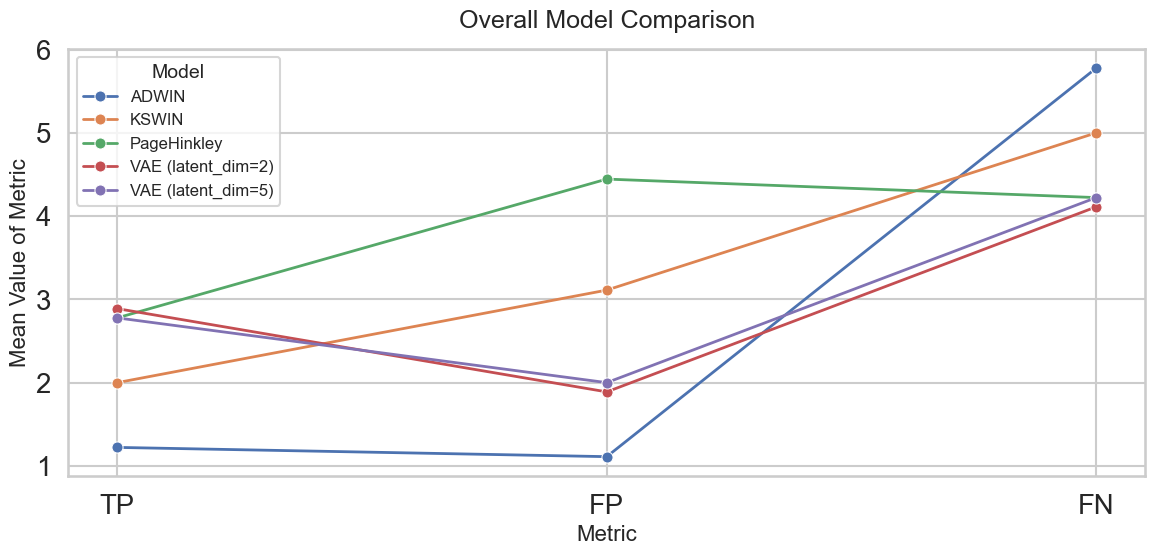

In [ ]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)

plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=df_long,
    x='Metric', y='Value', hue='Model',
    marker='o', linewidth=2, markersize=8
)

ax.set_title(f'Overall Model Comparison - {group_name} Group', fontsize=18, pad=15)
ax.set_xlabel('Metric', fontsize=16)
ax.set_ylabel('Mean Value of Metric', fontsize=16)
ax.legend(title='Model', fontsize=12, title_fontsize=14)
plt.tight_layout()

plt.savefig(f'plots/{group_name}_overall_model_comparison.pdf', dpi=300)
plt.show()

### Overall Model Comparison Plot

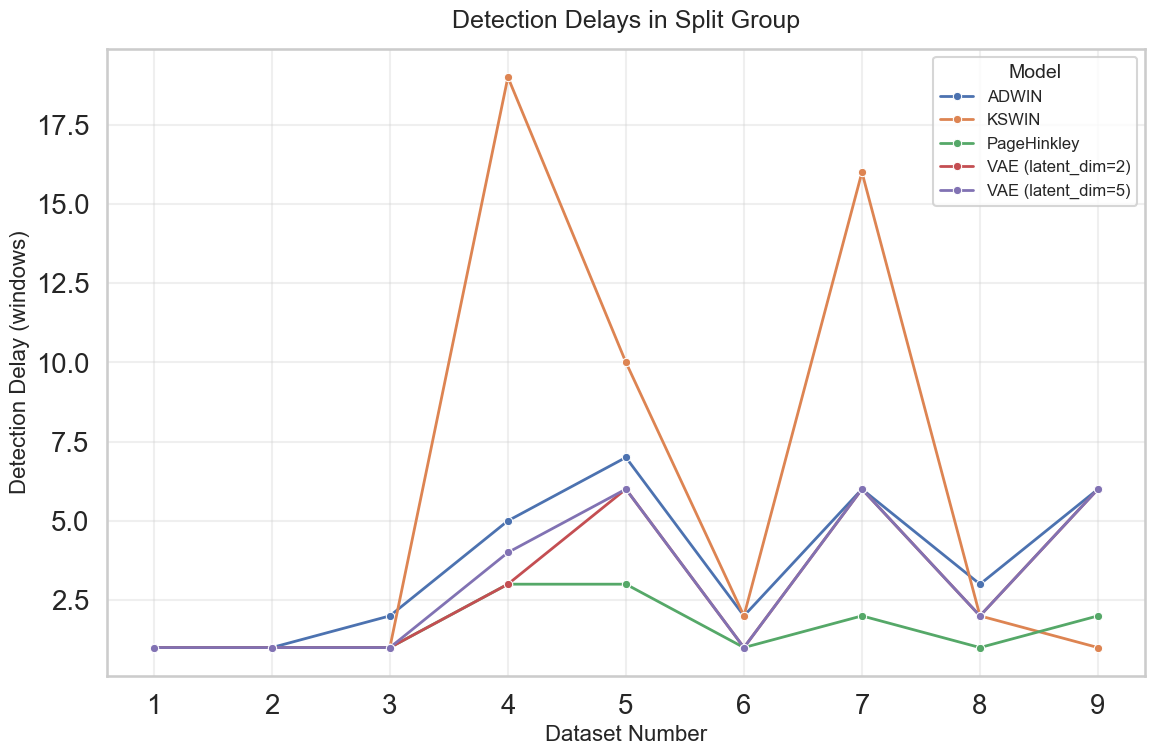

In [ ]:
# Prepare data for detection delays plot
delay_data = []
for model in results.keys():
    for i, value in enumerate(results[model]['detection_delays']):
        delay_data.append({
            'Dataset Number': i + 1,
            'Detection Delay': value,
            'Model': model
        })

delay_df = pd.DataFrame(delay_data)

# Create comparison plot
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=delay_df,
    x='Dataset Number',
    y='Detection Delay',
    hue='Model',
    marker='o',
    linewidth=2,
    markersize=6
)

plt.title(f'Detection Delays - {group_name} Group', fontsize=18, pad=15)
plt.xlabel('Dataset Number', fontsize=16)
plt.ylabel('Detection Delay (windows)', fontsize=16)
plt.legend(title='Model', fontsize=12, title_fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'plots/{group_name}_detection_delays_plot.pdf', dpi=300)
plt.show()